In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import os
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

In [182]:
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_time_series')

In [183]:
data = pd.read_csv('Datasets/deriv.csv')

In [184]:
print('Column names:', data.columns)

Column names: Index(['Date', 'Time', 'Volatility 100 (1s) Index'], dtype='object')


In [185]:
data

,Date,Time,Volatility 100 (1s) Index
0,2024-01-12,19:14:49,1305.37
1,2024-01-12,19:14:50,1305.58
2,2024-01-12,19:14:51,1305.64
3,2024-01-12,19:14:52,1305.84
4,2024-01-12,19:14:53,1305.85
...,...,...,...
95,2024-01-12,19:16:24,1311.23
96,2024-01-12,19:16:25,1310.84
97,2024-01-12,19:16:26,1310.44
98,2024-01-12,19:16:27,1310.45


In [186]:
# Assuming 'Date' and 'Time' columns are in datetime format
if 'Date' in data.columns and 'Time' in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('DateTime', inplace=True)

data

,Date,Time,Volatility 100 (1s) Index
DateTime,,,
2024-01-12 19:14:49,2024-01-12,19:14:49,1305.37
2024-01-12 19:14:50,2024-01-12,19:14:50,1305.58
2024-01-12 19:14:51,2024-01-12,19:14:51,1305.64
2024-01-12 19:14:52,2024-01-12,19:14:52,1305.84
2024-01-12 19:14:53,2024-01-12,19:14:53,1305.85
...,...,...,...
2024-01-12 19:16:24,2024-01-12,19:16:24,1311.23
2024-01-12 19:16:25,2024-01-12,19:16:25,1310.84
2024-01-12 19:16:26,2024-01-12,19:16:26,1310.44


In [187]:
print('Column names:', data.columns)

Column names: Index(['Date', 'Time', 'Volatility 100 (1s) Index'], dtype='object')


<Axes: xlabel='DateTime'>

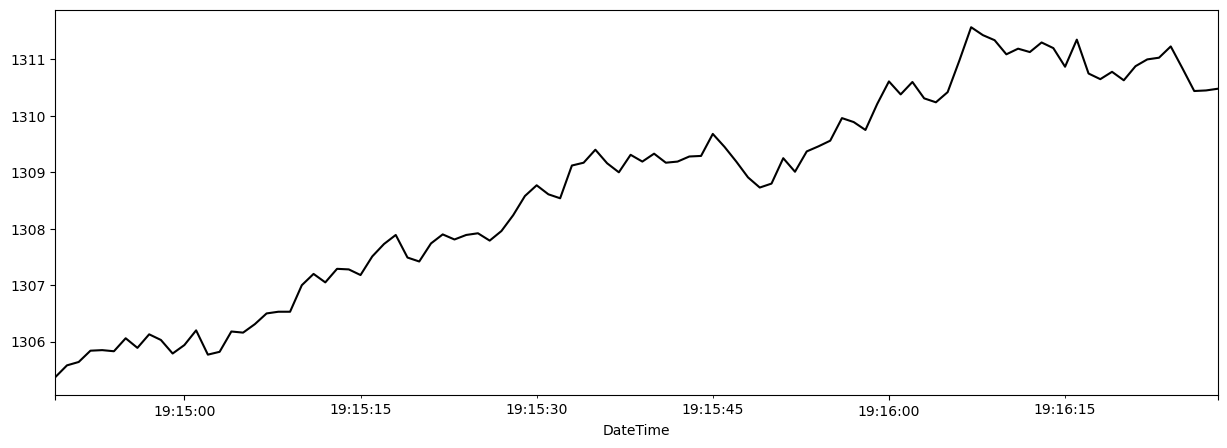

In [188]:
fig, axarr = plt.subplots(1, sharex=True)
fig.set_size_inches(15, 5)

data['Volatility 100 (1s) Index'].plot( color='k')

In [189]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

model = pm.auto_arima(data["Volatility 100 (1s) Index"], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4.832, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6.404, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6.239, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7.201, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6.823, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.193 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  -0.416
Date:                Fri, 12 Jan 2024   AIC                              4.832
Time:                        19:24:22   BIC                             10.022
Sample:                    01-12-2024   HQIC                             6.932
                         - 01-12-2024                                         
Covariance T

In [190]:
forecast_values, confint = model.predict(n_periods=5, return_conf_int=True)

prediction

2024-01-12 19:16:29    1310.531616
2024-01-12 19:16:30    1310.583232
2024-01-12 19:16:31    1310.634848
2024-01-12 19:16:32    1310.686465
2024-01-12 19:16:33    1310.738081
Freq: S, dtype: float64